### 1. Importação das bibliotecas

In [1]:
# Manipulação dos dados
import numpy as np 
import pandas as pd 
import scipy as sp
import scipy.stats as st
# DataViz
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn.objects as so

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Configuração de importação do dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-for-bank-customers/churn.csv


### 2. Importação do dataset e manipulação dos dados

In [3]:
# Importação do dataset
df = pd.read_csv('/kaggle/input/churn-for-bank-customers/churn.csv')
# Mostrar primeiros registros
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Exclusão das colunas não utilizadas
df.drop(columns = {'RowNumber', 'CustomerId', 'Surname'}, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Criar lista com nome das novas variáveis
novas_colunas = {
    'CreditScore': 'Score',
    'Geography': 'Pais',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Tenure': 'Fidelidade',
    'Balance': 'Saldo',
    'NumOfProducts': 'QtdProdutos',
    'HasCrCard': 'TemCartao',
    'IsActiveMember': 'ClienteAtivo',
    'EstimatedSalary': 'Renda',
    'Exited': 'Churn'
    }
#renomeando as variáveis
df.rename(columns = novas_colunas, inplace = True)
#
del(novas_colunas)
#
df.head()

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. EDA - Análise Exploratória

In [6]:
#Informações sobre missing values e tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Score         10000 non-null  int64  
 1   Pais          10000 non-null  object 
 2   Genero        10000 non-null  object 
 3   Idade         10000 non-null  int64  
 4   Fidelidade    10000 non-null  int64  
 5   Saldo         10000 non-null  float64
 6   QtdProdutos   10000 non-null  int64  
 7   TemCartao     10000 non-null  int64  
 8   ClienteAtivo  10000 non-null  int64  
 9   Renda         10000 non-null  float64
 10  Churn         10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
#Criar lista com o nome das colunas (variáveis)
variaveis = df.columns.to_list()
variaveis

['Score',
 'Pais',
 'Genero',
 'Idade',
 'Fidelidade',
 'Saldo',
 'QtdProdutos',
 'TemCartao',
 'ClienteAtivo',
 'Renda',
 'Churn']

In [8]:
#Mostrar a quantidade de registros em cada variável
df[variaveis].nunique()

Score            460
Pais               3
Genero             2
Idade             70
Fidelidade        11
Saldo           6382
QtdProdutos        4
TemCartao          2
ClienteAtivo       2
Renda           9999
Churn              2
dtype: int64

In [9]:
# Listar variáveis quantitativa contínuas
var_quantitativas_continuas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'float64' and variavel not in 'Churn']
var_quantitativas_continuas

['Saldo', 'Renda']

In [10]:
# Mostrar informaçõs estatísticas das variáveis quantitativas contínuas
df[var_quantitativas_continuas].describe().T

,count,mean,std,min,25%,50%,75%,max
Saldo,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Renda,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [11]:
# Listar variáveis quantitativa discretas
var_quantitativas_discretas = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() > 2 and variavel not in 'Churn']
var_quantitativas_discretas

['Score', 'Idade', 'Fidelidade', 'QtdProdutos']

In [12]:
# Mostrar informaçõs estatísticas das variáveis quantitativas discretas
df[var_quantitativas_discretas].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Idade,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Fidelidade,10000.0,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
QtdProdutos,10000.0,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [13]:
# Listar variáveis qualitativas nominais
var_qualitativas_nominais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'object' and variavel not in 'Churn']
var_qualitativas_nominais

['Pais', 'Genero']

In [14]:
# Mostrar informaçõs estatísticas das variáveis qualitativas nominais
df[var_qualitativas_nominais].describe().T

,count,unique,top,freq
Pais,10000,3,France,5014
Genero,10000,2,Male,5457


In [15]:
#Alterando o conteúdo das variáveis categóricas
#* Localização
df['Pais'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pais, dtype: int64

In [16]:
#Alterando os valores da variável #Localização
df['Pais'].replace({
    'France' : 'França',
    'Germany' : 'Alemanha',
    'Spain' : 'Espanha'
}, inplace = True)
#
df['Pais'].unique()

array(['França', 'Espanha', 'Alemanha'], dtype=object)

In [17]:
#Alterando o conteúdo das variáveis categóricas
#* Gênero
df['Genero'].value_counts()

Male      5457
Female    4543
Name: Genero, dtype: int64

In [18]:
#Alterando os valores da variável #Localização
#* Gênero
df['Genero'].replace({
    'Male' : 'Masculino',
    'Female' : 'Feminino'
}, inplace = True)
#
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [19]:
# Listar variáveis qualitativas ordinais
var_qualitativas_ordinais = [
    variavel for variavel in df.columns
        if df[variavel].dtype == 'int64' and df[variavel].nunique() == 2 and variavel not in 'Churn']
var_qualitativas_ordinais

['TemCartao', 'ClienteAtivo']

#### 3.1. Análise univariada

In [20]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'whitegrid', palette = 'muted',
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None
)

##### 3.1.1. Score de Crédito

<AxesSubplot: xlabel='Score'>

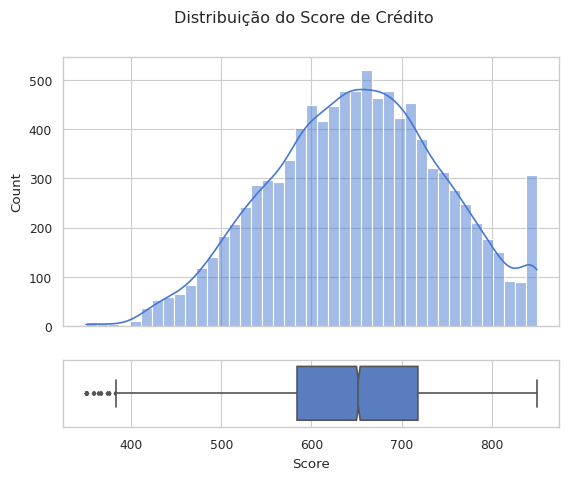

In [21]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição do Score de Crédito')
#Gráfico 1 - Histograma
sns.histplot(x = df['Score'], kde = True, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Score'], fliersize = 2, notch = True, ax = axs[1])